In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobilenet-v2/tensorflow2/035-128-classification/2/saved_model.pb
/kaggle/input/mobilenet-v2/tensorflow2/035-128-classification/2/variables/variables.index
/kaggle/input/mobilenet-v2/tensorflow2/035-128-classification/2/variables/variables.data-00000-of-00001
/kaggle/input/mobilenetv2/mobilenet_v2_weights.h5
/kaggle/input/food11/food11/test/omelette/122397.jpg
/kaggle/input/food11/food11/test/omelette/84313.jpg
/kaggle/input/food11/food11/test/omelette/234922.jpg
/kaggle/input/food11/food11/test/omelette/299730.jpg
/kaggle/input/food11/food11/test/omelette/108599.jpg
/kaggle/input/food11/food11/test/omelette/127217.jpg
/kaggle/input/food11/food11/test/omelette/315169.jpg
/kaggle/input/food11/food11/test/omelette/79767.jpg
/kaggle/input/food11/food11/test/omelette/54891.jpg
/kaggle/input/food11/food11/test/omelette/29620.jpg
/kaggle/input/food11/food11/test/omelette/162301.jpg
/kaggle/input/food11/food11/test/omelette/94651.jpg
/kaggle/input/food11/food11/test/omelette/176.

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
train_dir = "/kaggle/input/food11/food11/train"
test_dir  = "/kaggle/input/food11/food11/test"

In [22]:
target_size = (224,224)
batch_size = 16

# Data Generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
   # rotation_range=40,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
#    shear_range=0.2,
#    zoom_range=0.2,
    #horizontal_flip=True,
    #vertical_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',    
    shuffle=True,
    seed=42,
    class_mode='categorical')

Found 9900 images belonging to 11 classes.


In [23]:
food_items = [
    'apple_pie',
    'cheesecake',
    'chicken_curry',
    'french_fries',
    'fried_rice',
    'hamburger',
    'hot_dog',
    'ice_cream',
    'omelette',
    'pizza',
    'sushi'
]

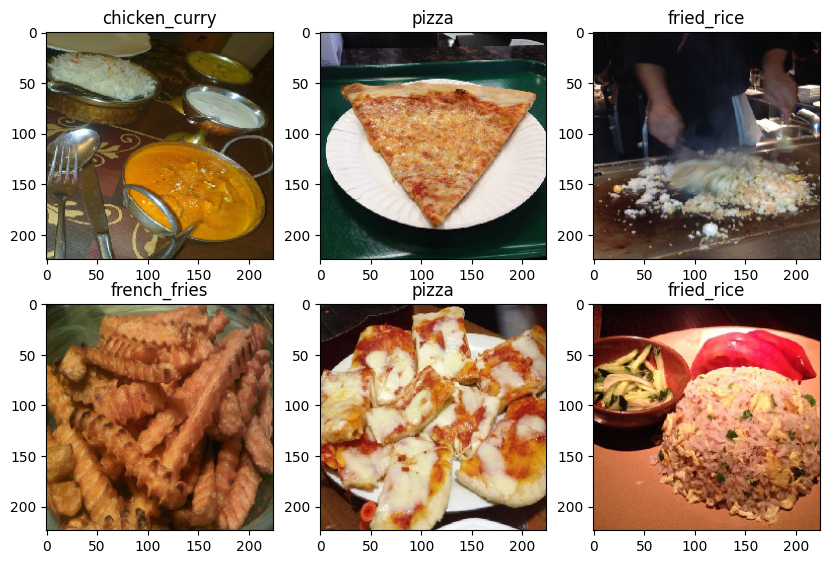

In [57]:
images, labels = next(train_generator)


plt.figure( figsize = (10,10))

for i in range(6):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.title( food_items[np.argmax(labels[i])])

In [25]:
# Data Augumentation for testing data
test_datagen = ImageDataGenerator(
    rescale=1./255,
   # rotation_range=40,
    #width_shift_range=0.2,
    
    #height_shift_range=0.2,
#    shear_range=0.2,
#    zoom_range=0.2,
    #horizontal_flip=True,
    #vertical_flip=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False,    
    class_mode='categorical')

Found 1100 images belonging to 11 classes.


# Building a Model

In [26]:
import tensorflow.keras as keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2

In [27]:
num_classes = 11

local_weights_path = "/kaggle/input/mobilenetv2/mobilenet_v2_weights.h5"
model=MobileNetV2(input_shape=(224,224,3), weights=None, include_top=False)
model.load_weights(local_weights_path)

In [28]:
x=model.output
x=GlobalAveragePooling2D()(x)
x=Dense(512,activation='relu')(x) 
x=Dense(64,activation='relu')(x) 
out=Dense(num_classes,activation='softmax')(x) 

mobileNet_model=Model(inputs=model.input,outputs=out)

In [29]:
model.trainable = False

In [30]:
mobileNet_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

In [32]:
mobileNet_model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [33]:
num_epochs = 30
mobileNet_model.fit(train_generator, steps_per_epoch=STEP_SIZE_TRAIN, epochs=num_epochs)

Epoch 1/30
618/618 [==============================] - 38s 56ms/step - loss: 0.8626 - accuracy: 0.7249
Epoch 2/30
618/618 [==============================] - 35s 56ms/step - loss: 0.5518 - accuracy: 0.8195
Epoch 3/30
618/618 [==============================] - 35s 56ms/step - loss: 0.4361 - accuracy: 0.8565
Epoch 4/30
618/618 [==============================] - 35s 56ms/step - loss: 0.3245 - accuracy: 0.8942
Epoch 5/30
618/618 [==============================] - 35s 57ms/step - loss: 0.2442 - accuracy: 0.9165
Epoch 6/30
618/618 [==============================] - 35s 57ms/step - loss: 0.1575 - accuracy: 0.9468
Epoch 7/30
618/618 [==============================] - 34s 55ms/step - loss: 0.1208 - accuracy: 0.9592
Epoch 8/30
618/618 [==============================] - 35s 57ms/step - loss: 0.0999 - accuracy: 0.9656
Epoch 9/30
618/618 [==============================] - 34s 56ms/step - loss: 0.0837 - accuracy: 0.9738
Epoch 10/30
618/618 [==============================] - 35s 56ms/step - loss: 0.057

In [16]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("No GPU devices found.")

# Configure TensorFlow to use the GPU
config = tf.compat.v1.ConfigProto(allow_soft_placement=True)
config.gpu_options.per_process_gpu_memory_fraction = 0.8  # You can adjust the memory fraction as needed
tf.compat.v1.Session(config=config)

Default GPU Device: /device:GPU:0


In [18]:
num_epochs = 30
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_TEST =test_generator.n//test_generator.batch_size

In [46]:
pred = mobileNet_model.predict(test_generator)

69/69 [==============================] - 4s 55ms/step


In [40]:
test_image , test_label = next(test_generator)

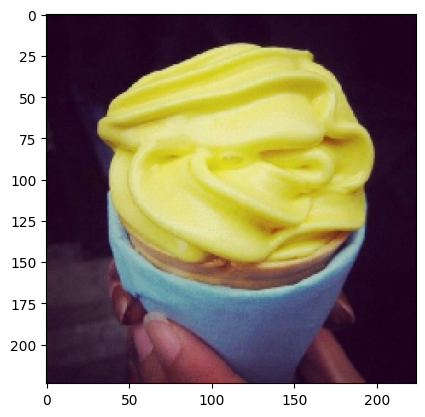

In [68]:
plt.imshow(images[15])

In [87]:
batch_size = min(1100, len(test_images))
test_images = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size = 1100,
    color_mode='rgb',
    shuffle=False,    
    class_mode='categorical')

Found 1100 images belonging to 11 classes.


In [91]:
images , label = next(test_images)

In [92]:
len(images)

1100

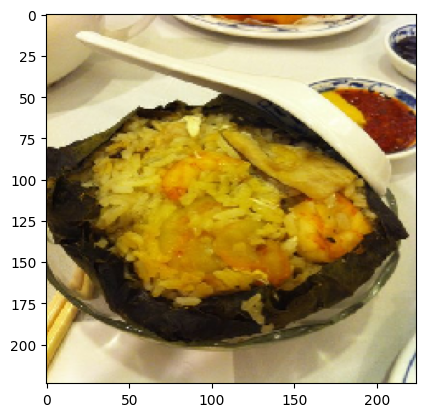

sushi
sushi


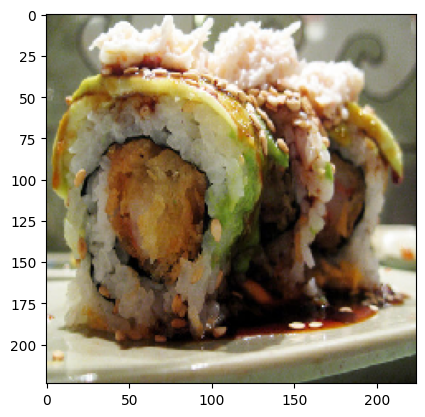

apple_pie
apple_pie


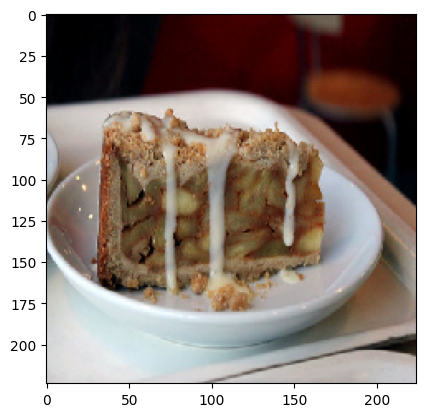

ice_cream
hot_dog


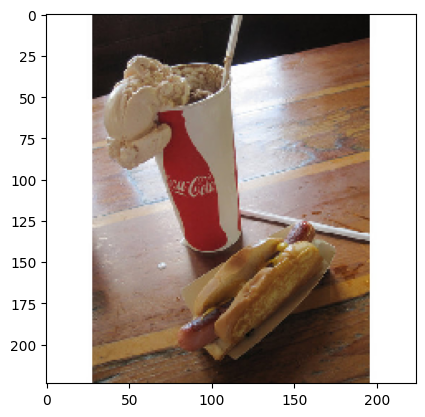

fried_rice
sushi


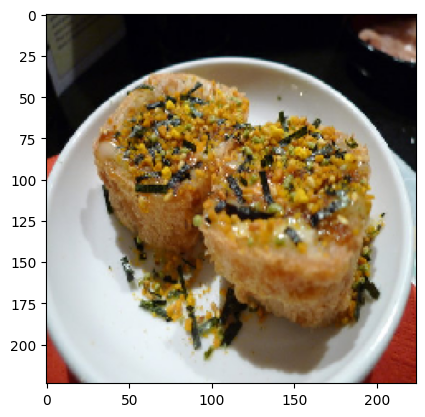

french_fries
omelette


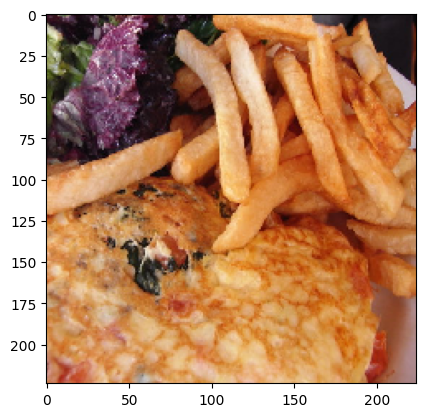

ice_cream
ice_cream


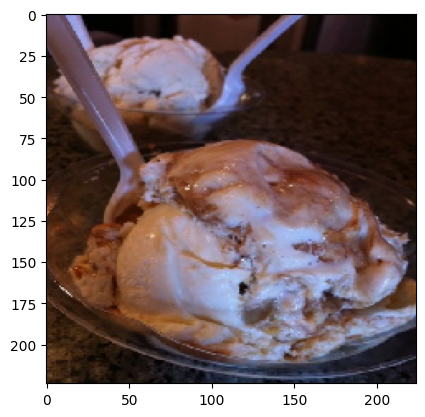

omelette
omelette


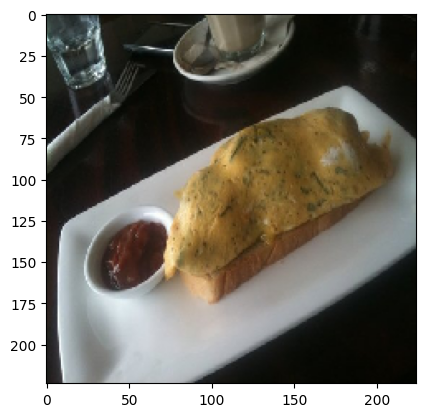

ice_cream
ice_cream


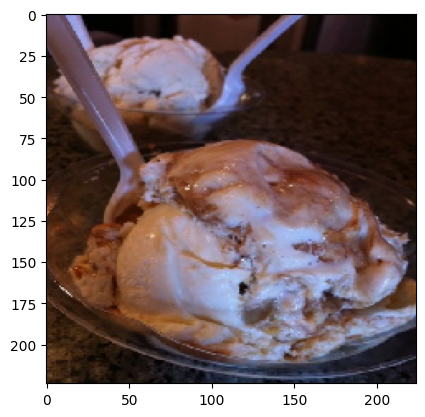

cheesecake
cheesecake


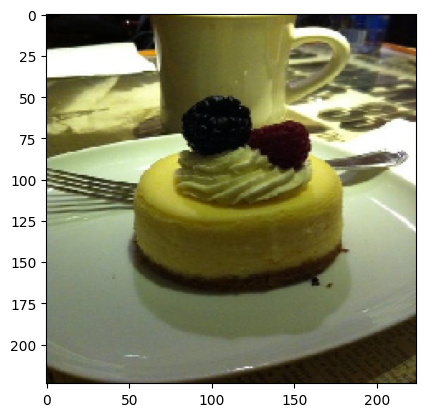

hot_dog
hot_dog


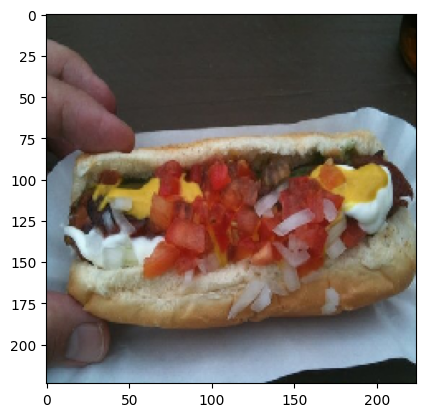

In [113]:
for i in range(10):
    
    i = np.random.randint(0, 1100)
    plt.imshow(images[i])
    print(food_items[np.argmax(pred[i])])
    print(food_items[np.argmax(label[i])])
    
    plt.show()

In [116]:
import requests
from PIL import Image
from io import BytesIO

In [126]:
image = Image.open("/kaggle/input/sushi123/california-sushi-rolls-square.jpg")
img  = np.array(image)

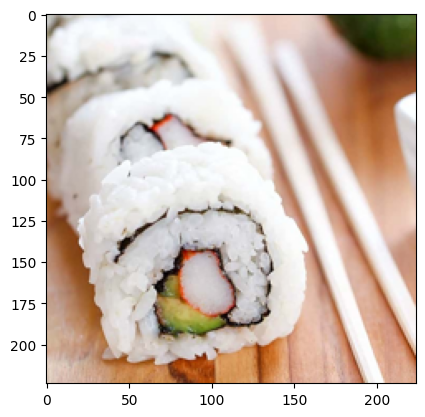

In [132]:
image = image.resize((224, 224))
img = np.array(image)
plt.imshow(img)

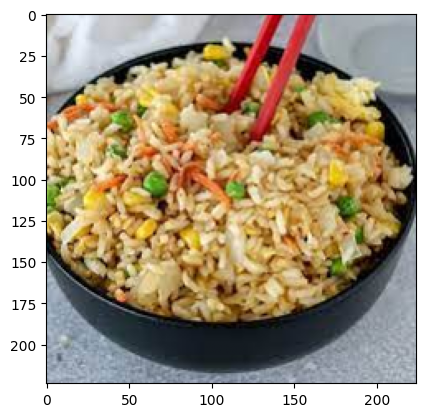

In [149]:
normal = img / 255
plt.imshow(normal)

In [150]:
input_data = np.expand_dims(normal, axis=0)

# Now, input_data has shape (1, 224, 224, 3), which matches the model's expected input shape

# Assuming mobileNet_model is your model
predictions = mobileNet_model.predict(input_data)

1/1 [==============================] - 0s 24ms/step


In [151]:
food_items[np.argmax(predictions)]

'fried_rice'

In [139]:
food_items

['apple_pie',
 'cheesecake',
 'chicken_curry',
 'french_fries',
 'fried_rice',
 'hamburger',
 'hot_dog',
 'ice_cream',
 'omelette',
 'pizza',
 'sushi']

In [147]:
image = Image.open("/kaggle/input/rice123/download (1).jpeg")
image = image.resize((224,224))
img = np.array(image)

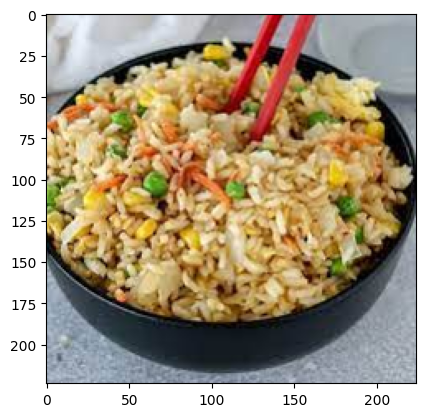

In [148]:
plt.imshow(img)

In [152]:
import pickle
# Save the model to a file using pickle
with open('/kaggle/working/model.pkl', 'wb') as file:
    pickle.dump(mobileNet_model, file)